# Assignment

Due date: Dec 2, 2022 6p

You may submit the work as a group. Please submit all code and plots for Question 3 for full credit either using screenshots or as a PDF. Email the instructor your answers (bekah@umd.edu) and feel free to ask questions. 

IMPORTANT! If you are using binder, the notebook can timeout after 10-15 mins of inactivity. If you need to step away, download/save your work!

1. Overexposure to sunlight is [damaging to coral reefs](https://aambpublicoceanservice.blob.core.windows.net/oceanserviceprod/facts/coralbleaching-large.jpg). Which is more important for monitoring coral reefs, RSR or DSR? Why? [10 pts]

2. What impact will the following have on an RSR value and why? [35 pts]

* Cloud-free
* Dark rainforest
* Stratospheric ozone (hint ozone absorbs shortwave radiation)
* The sun is directly overhead
* The local time is midnight
* Thin cirrus clouds

3. Using the template below as a guide, create a plot of *DSR* ('ABI-L2-DSRF') on a Nov 22, 2022 at 18:00 UTC. Refer to the original tutorial to fill in the missing portions. [40 pts]

4. Identify the high/low measurements of DSR in your plot and speculate what atmospheric features could be causing these values. [15 pts]


In [37]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import s3fs
import cartopy.crs as ccrs

In [38]:
fs = s3fs.S3FileSystem(anon=True)

In [39]:
bucket_name = 'noaa-goes16'
product_name = 'ABI-L2-DSRF'
year = 2022
doy = 324
hour = 18

path = bucket_name + '/' + product_name + '/' + str(year) + '/' + str(doy).zfill(3) + '/' + str(hour).zfill(2) + '/'
print(path)

noaa-goes16/ABI-L2-DSRF/2022/324/18/


In [40]:
# If this is empty, check the path above!
files = fs.ls(path)
print(files)

['noaa-goes16/ABI-L2-DSRF/2022/324/18/OR_ABI-L2-DSRF-M6_G16_s20223241800206_e20223241809514_c20223241828473.nc']


In [41]:
# Open adn then read the file
# Note: you'll have to inspect the contents and find the DSR variable
remote_obj = fs.open(files[0], mode='rb')
abi_L2 = xr.open_dataset(remote_obj, engine='h5netcdf')

In [42]:
lat = abi_L2.lat.values
lon = abi_L2.lon.values

In [43]:
# Project the 1D grid into 2D
X, Y = np.meshgrid(lon, lat)

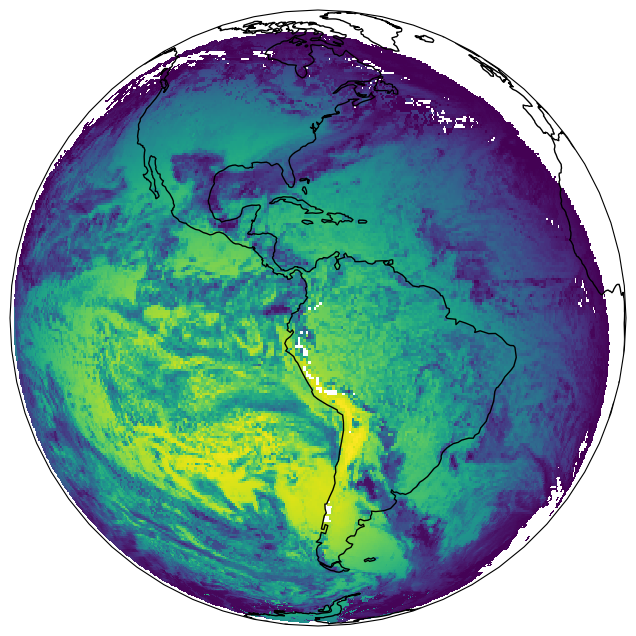

In [44]:
plt.figure(figsize=[8,8])

ax = plt.subplot(projection=ccrs.Orthographic(central_longitude=-75.2))
ax.coastlines()
ax.set_global()

tmp = ax.pcolormesh(X, Y, abi_L2.DSR, transform=ccrs.PlateCarree())

plt.show()